### Exercise 1

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

data = load_iris()
X = data.data
y = data.target

# Define different numbers of clusters to try
num_clusters = [2, 3, 4, 5]

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    # Create a confusion matrix
    confusion_mat = confusion_matrix(y, y_pred)
    print(f"Confusion matrix for {k} clusters:")
    print(confusion_mat)
    print("\n")


Confusion matrix for 2 clusters:
[[ 0 50  0]
 [47  3  0]
 [50  0  0]]


Confusion matrix for 3 clusters:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


Confusion matrix for 4 clusters:
[[ 0 50  0  0]
 [23  0 27  0]
 [26  0  1 23]
 [ 0  0  0  0]]


Confusion matrix for 5 clusters:
[[ 0 50  0  0  0]
 [23  0 27  0  0]
 [13  0  1 12 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]




### Exercise 2

Use the elbow method, the silhouette method, and the Davies-Bouldin method to evaluate your clustering result.  Do the data-driven methods provide clear guidance?

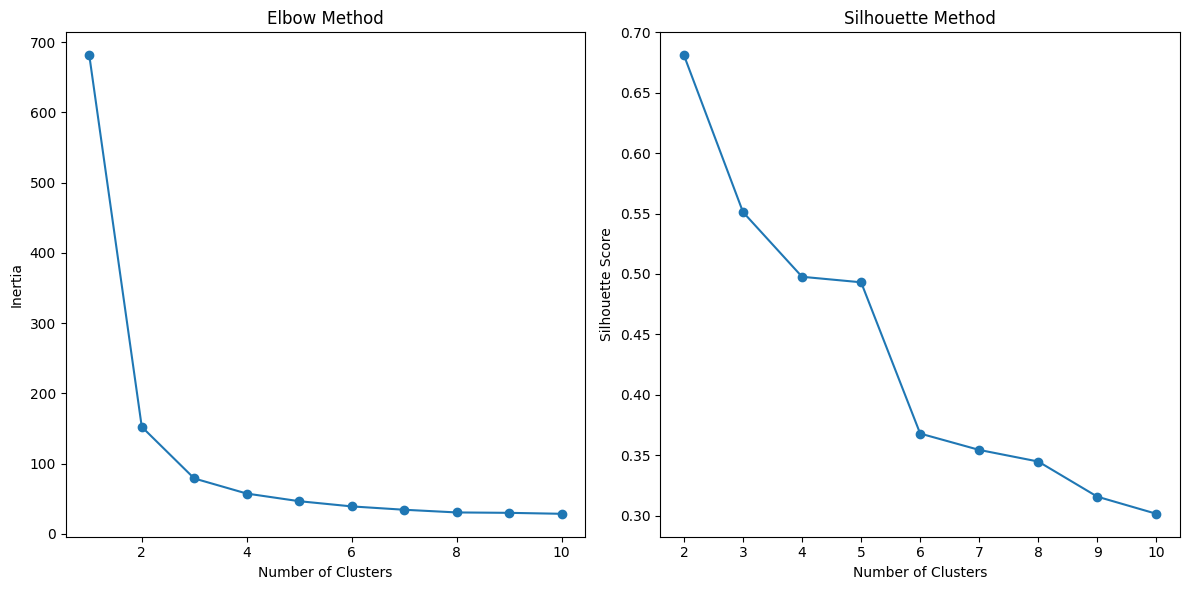

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X = data.data

# Calculate the metrics for different numbers of clusters
max_clusters = 10
inertia = []

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Calculate silhouette scores and Davies-Bouldin scores for different numbers of clusters
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    silhouette_scores.append(silhouette_score(X, y_pred))
    davies_bouldin_scores.append(davies_bouldin_score(X, y_pred))

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()


### Exercise 3

In the following example, MeanShift, SpectralClustering, DBScan and HDBScan to fit the data. For each clustering method, can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

In [7]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.8 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3675211 sha256=0835cce96a9139b1a2d09b3900040ab221445d7b36d1918cca78f212f4b5585b
  Stored in directory: /home/codespace/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


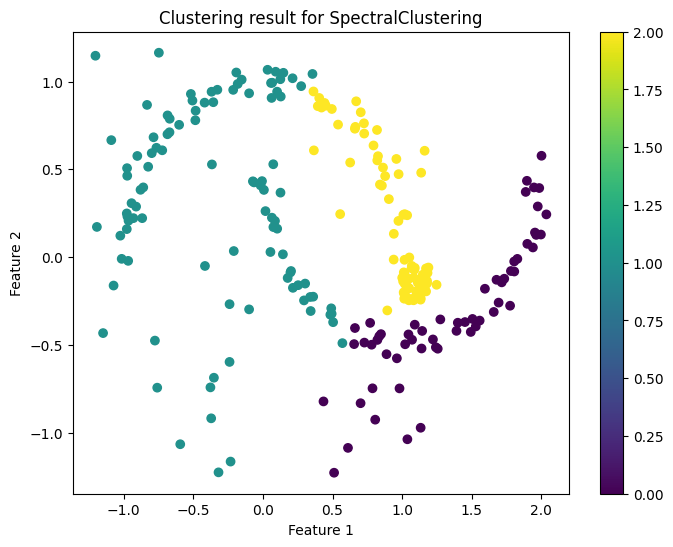

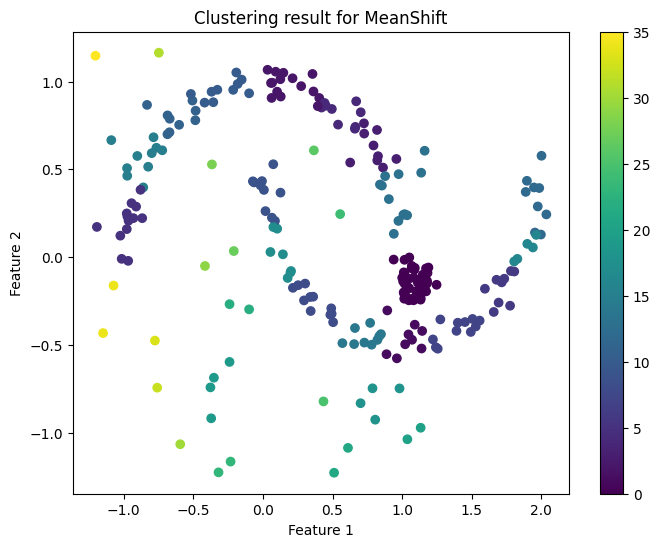

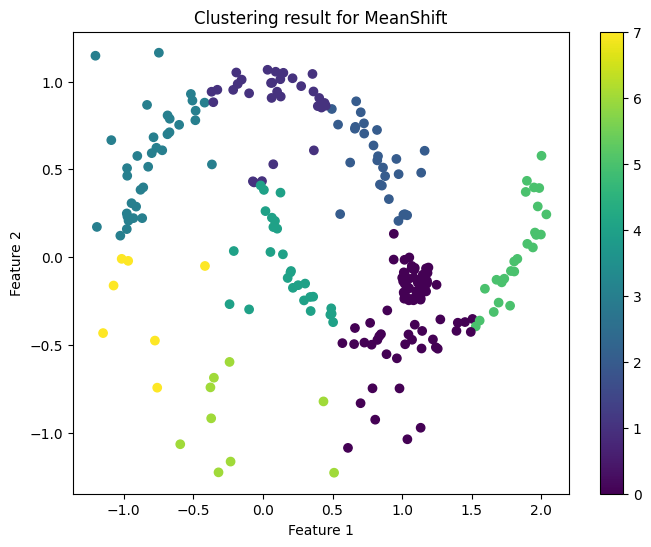

Best parameters for SpectralClustering: {'n_clusters': 3, 'gamma': 1}
Best parameters for MeanShift: {'bandwidth': 0.5}


In [2]:
import numpy as np
from sklearn.datasets import make_moons
import itertools
import hdbscan
from sklearn.cluster import SpectralClustering, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# Parameter grid for each clustering method
param_grid = {
    'SpectralClustering': {'n_clusters': [3, 4], 'gamma': [1, 10, 100]},
    'MeanShift': {'bandwidth': [0.2, 0.5, 1]},
    'DBSCAN': {'eps': [0.1, 0.2, 0.3], 'min_samples': [3, 5, 10]},
    'HDBSCAN': {'min_samples': [3, 5, 10], 'min_cluster_size': [5, 10, 15]}
}

best_params = {}
best_score = -1

# Grid search for each clustering method
for method, param_values in param_grid.items():
    for params in [dict(zip(param_values, v)) for v in itertools.product(*param_values.values())]:
        if method == 'SpectralClustering':
            clustering = SpectralClustering(affinity='nearest_neighbors', **params)
        elif method == 'MeanShift':
            clustering = MeanShift(**params)
        elif method == 'DBSCAN':
            clustering = DBSCAN(**params)
        elif method == 'HDBSCAN':
            clustering = hdbscan.HDBSCAN(**params)
        
        labels = clustering.fit_predict(data)
        unique_labels = np.unique(labels)
        
        # Skip silhouette score calculation if there's only one unique label
        if len(unique_labels) < 2:
            continue
        
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_params[method] = params
            
            # Visualize clustering result
            plt.figure(figsize=(8, 6))
            plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
            plt.title(f'Clustering result for {method}')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.colorbar()
            plt.show()

# Print best parameters for each method
for method, params in best_params.items():
    print(f"Best parameters for {method}: {params}")


### Exercise 4

The following plot contains five clusters.  See if you can set the parameters of GMM to identify all clusters.

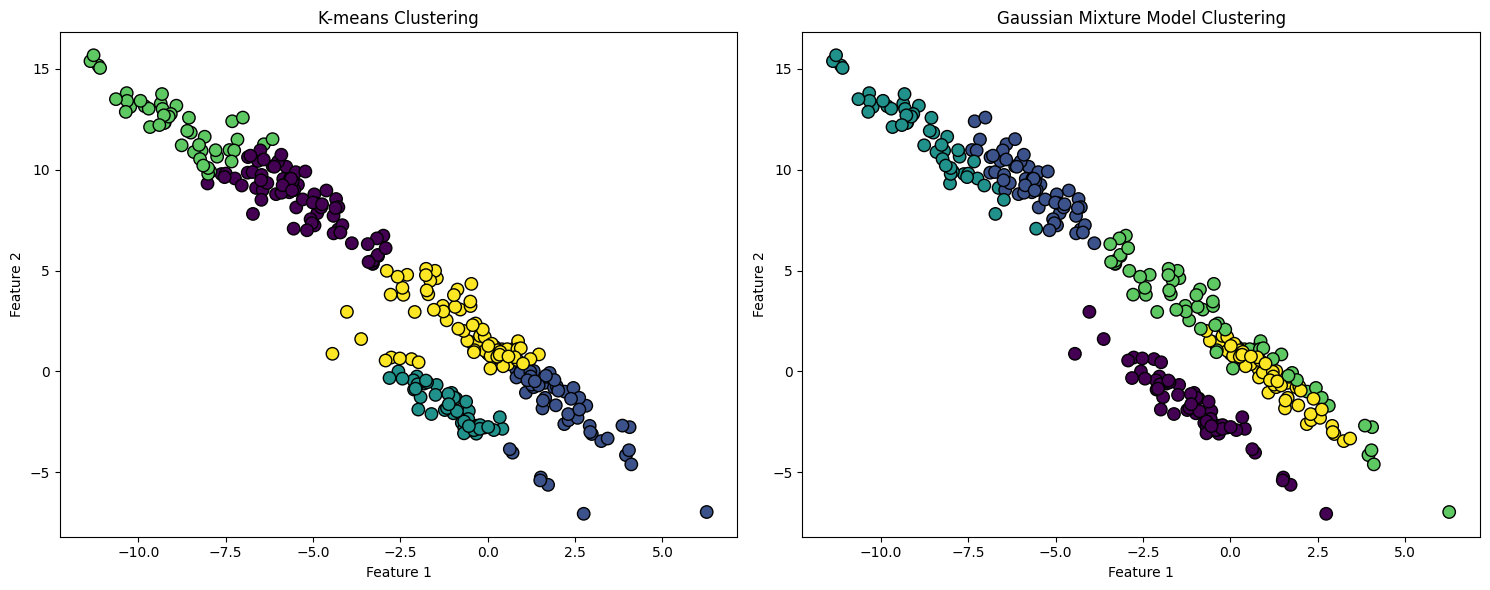

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
